In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("./car.data", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [262]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [263]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['class'] = label.fit_transform(df['class'])
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [264]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 특정 열들을 선택하여 스케일링 적용
columns_to_scale = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# 스케일링 후 데이터 확인
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000,2
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745,2
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745,2
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000,2
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745,2
...,...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.341641,1.224745,0.000000,1.224745,1
1724,-0.447214,-0.447214,1.341641,1.224745,0.000000,-1.224745,3
1725,-0.447214,-0.447214,1.341641,1.224745,-1.224745,0.000000,2
1726,-0.447214,-0.447214,1.341641,1.224745,-1.224745,1.224745,1


Text(0.5, 1.0, 'Class')

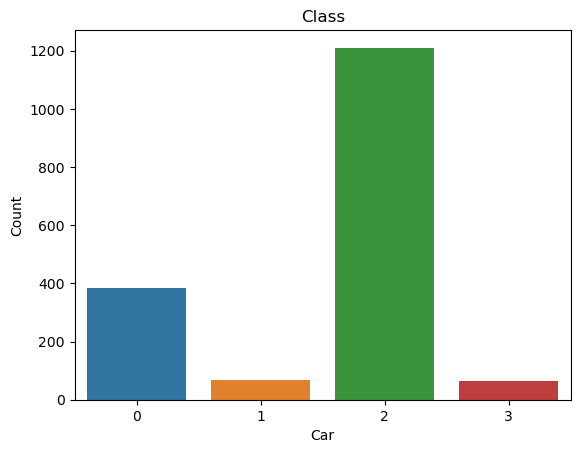

In [265]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Class")

In [266]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [267]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [268]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [269]:
X=df.drop('class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,buying,maint,doors,persons,lug_boot,safety
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745


In [270]:
y=df['class']
y.value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,buying,maint,doors,persons,lug_boot,safety
520,-1.341641,1.341641,1.341641,-1.224745,-1.224745,1.224745
621,-1.341641,-1.341641,1.341641,-1.224745,1.224745,0.000000
1017,0.447214,-1.341641,-0.447214,1.224745,1.224745,0.000000
1273,0.447214,-0.447214,1.341641,-1.224745,0.000000,1.224745
924,0.447214,1.341641,0.447214,-1.224745,-1.224745,0.000000
...,...,...,...,...,...,...
835,-1.341641,-0.447214,0.447214,1.224745,-1.224745,1.224745
1216,0.447214,-0.447214,-0.447214,-1.224745,1.224745,1.224745
1653,-0.447214,-0.447214,-0.447214,-1.224745,-1.224745,0.000000
559,-1.341641,-1.341641,-1.341641,1.224745,1.224745,1.224745


In [272]:
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [273]:
#X_train의 특성 개수
X_train.shape[1]

6

In [274]:
y_train

520     2
621     2
1017    2
1273    2
924     2
       ..
835     0
1216    2
1653    2
559     2
684     2
Name: class, Length: 1296, dtype: int32

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [276]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test) 
#예측한 값을 pred_lr에 저장

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#예측한 값과 실제 값을 비교
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6527777777777778
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 25   0 268   3]
 [  4   0   9   3]]


In [277]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


## One-Hot Ecoding

In [278]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,buying,maint,doors,persons,lug_boot,safety
601,-1.341641,-1.341641,0.447214,-1.224745,-1.224745,1.224745
1639,-0.447214,-0.447214,-1.341641,1.224745,1.224745,1.224745
1581,-0.447214,0.447214,0.447214,0.000000,-1.224745,0.000000
351,1.341641,-0.447214,-0.447214,-1.224745,1.224745,0.000000
916,0.447214,1.341641,-0.447214,1.224745,-1.224745,1.224745
...,...,...,...,...,...,...
835,-1.341641,-0.447214,0.447214,1.224745,-1.224745,1.224745
1216,0.447214,-0.447214,-0.447214,-1.224745,1.224745,1.224745
1653,-0.447214,-0.447214,-0.447214,-1.224745,-1.224745,0.000000
559,-1.341641,-1.341641,-1.341641,1.224745,1.224745,1.224745


In [280]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(16,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 16)                112       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 4)                 36        
                                                                 
Total params: 284 (1.11 KB)
Trainable params: 284 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [281]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
30/30 [==============================] - 8s 25ms/step - loss: 0.8815 - accuracy: 0.6411 - val_loss: 0.7227 - val_accuracy: 0.6928
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6584 - accuracy: 0.7063 - val_loss: 0.6422 - val_accuracy: 0.6889
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.5826 - accuracy: 0.7126 - val_loss: 0.5768 - val_accuracy: 0.7365
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4898 - accuracy: 0.7684 - val_loss: 0.4785 - val_accuracy: 0.7982
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8400 - val_loss: 0.3414 - val_accuracy: 0.8612
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2694 - accuracy: 0.8926 - val_loss: 0.3235 - val_accuracy: 0.8740
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2235 - accuracy: 0.8989 - val_loss: 0.1966 - val_accuracy: 0.9267
Epoch 8/20
30/30 [=

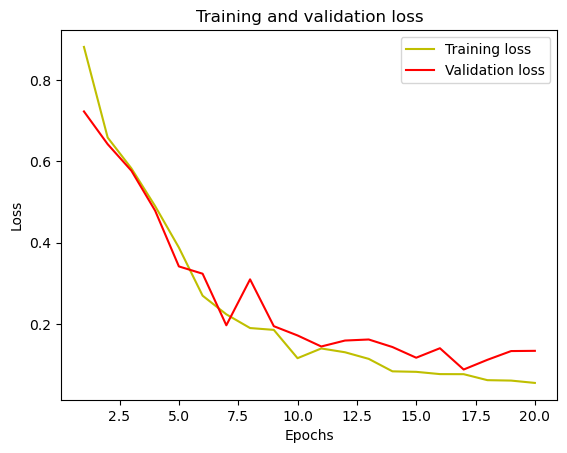

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

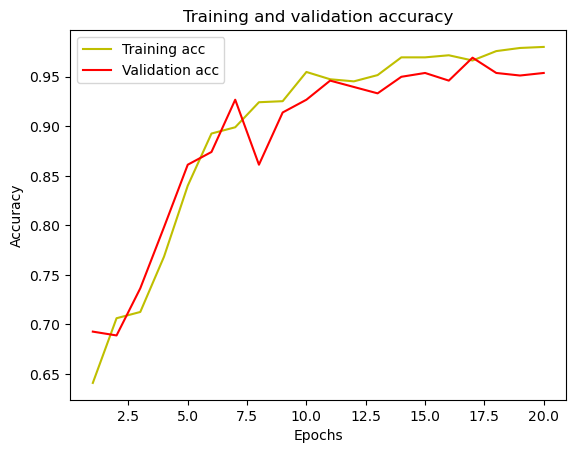

In [283]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [284]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       173
           1       0.78      0.90      0.84        31
           2       1.00      0.96      0.98       539
           3       0.83      1.00      0.91        35

    accuracy                           0.95       778
   macro avg       0.88      0.95      0.91       778
weighted avg       0.96      0.95      0.95       778

[[159   7   2   5]
 [  1  28   0   2]
 [ 18   1 520   0]
 [  0   0   0  35]]


In [285]:
# NumPy의 corrcoef() 함수를 사용하여 상관관계 계산
correlation_matrix_np = np.corrcoef(df.values, rowvar=False)
print("NumPy를 이용한 상관관계 행렬:")
print(correlation_matrix_np)

NumPy를 이용한 상관관계 행렬:
[[ 1.00000000e+00  7.55568447e-17 -4.83152613e-17 -2.82695678e-18
  -3.85494106e-19 -1.36782099e-20  5.14242240e-02]
 [ 7.55568447e-17  1.00000000e+00 -1.54197642e-17 -6.42490176e-19
   1.28498035e-19 -1.36782099e-20  4.01936463e-02]
 [-4.83152613e-17 -1.54197642e-17  1.00000000e+00 -4.62592927e-18
  -5.13992141e-19  1.69030237e-21 -3.13274008e-02]
 [-2.82695678e-18 -6.42490176e-19 -4.62592927e-18  1.00000000e+00
   0.00000000e+00 -7.56173454e-20 -2.99468298e-01]
 [-3.85494106e-19  1.28498035e-19 -5.13992141e-19  0.00000000e+00
   1.00000000e+00  7.56173454e-20  3.31843249e-02]
 [-1.36782099e-20 -1.36782099e-20  1.69030237e-21 -7.56173454e-20
   7.56173454e-20  1.00000000e+00 -2.10437182e-02]
 [ 5.14242240e-02  4.01936463e-02 -3.13274008e-02 -2.99468298e-01
   3.31843249e-02 -2.10437182e-02  1.00000000e+00]]
